In [2]:
import numpy
%pip install 'scanpy[leiden]'
import scanpy as sc
import anndata as ad
import matplotlib
import seaborn

Note: you may need to restart the kernel to use updated packages.


In [244]:
Rhesus_singleplex=sc.read_10x_h5('Documents/bioinformatics practice/data_folder/2500_Rhesus_Monkey_PBMCs_Singleplex_5p_gem-x_Universal_Multiplex_count_raw_feature_bc_matrix.h5')

In [245]:
Rhesus_singleplex.var_names_make_unique()
Rhesus_singleplex
Rhesus_singleplex.var.value_counts()
Rhesus_singleplex

AnnData object with n_obs × n_vars = 360792 × 37079
    var: 'gene_ids', 'feature_types', 'genome'

In [246]:
Rhesus_singleplex.var["mt"] = Rhesus_singleplex.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(Rhesus_singleplex, qc_vars=["mt"],log1p=True,inplace=True)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


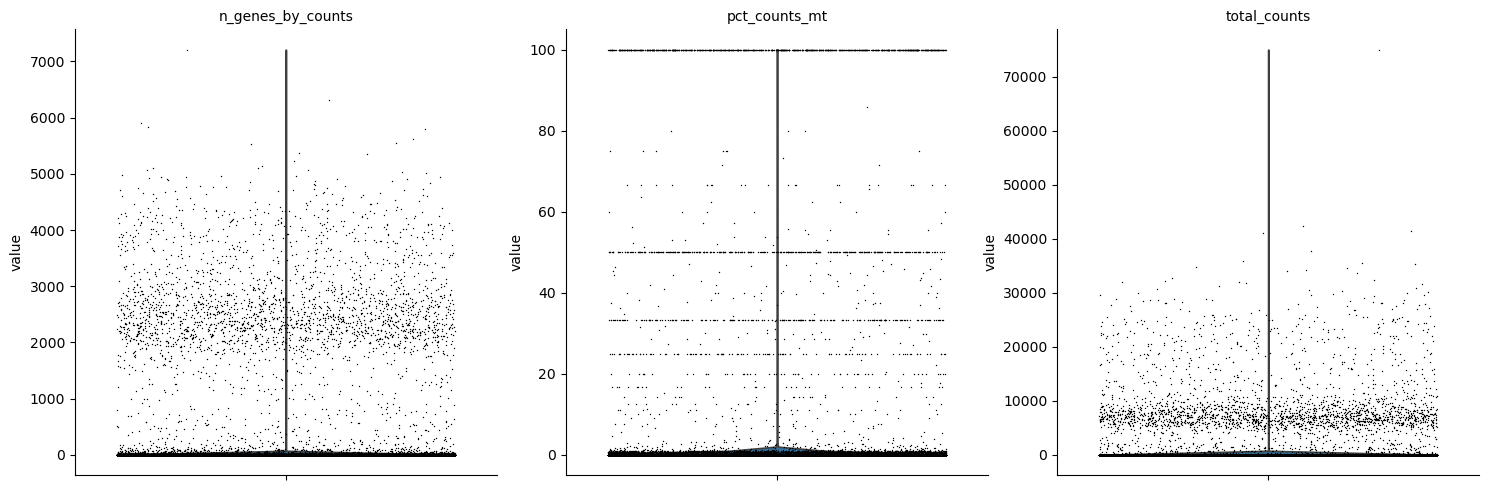

In [249]:
sc.pl.violin(Rhesus_singleplex,["n_genes_by_counts","pct_counts_mt","total_counts"],jitter=0.4,multi_panel=True)

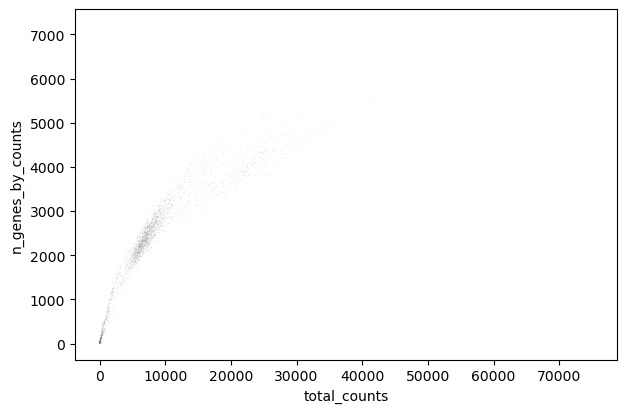

In [250]:
sc.pl.scatter(Rhesus_singleplex,x="total_counts",y="n_genes_by_counts")

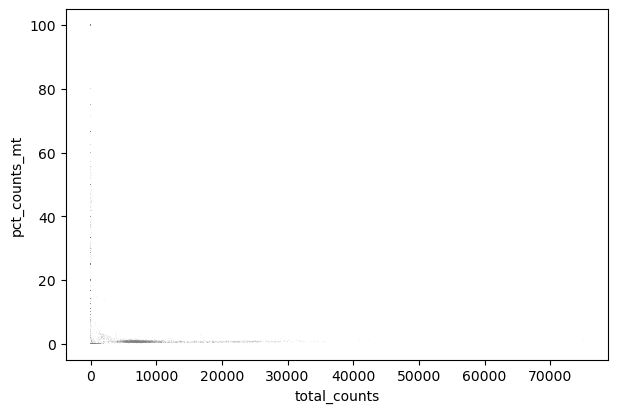

AnnData object with n_obs × n_vars = 360792 × 37079
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [251]:
sc.pl.scatter(Rhesus_singleplex,x="total_counts",y="pct_counts_mt")
Rhesus_singleplex

In [252]:
sc.pp.filter_cells(Rhesus_singleplex,min_genes=200)
sc.pp.filter_genes(Rhesus_singleplex,min_cells=3)

In [256]:
sc.pp.scrublet(adata=Rhesus_singleplex)

In [259]:
Rhesus_singleplex=Rhesus_singleplex[Rhesus_singleplex.obs['predicted_doublet']==False,:].copy()


In [262]:
Rhesus_singleplex.layers['counts']=Rhesus_singleplex.X.copy()
sc.pp.normalize_total(Rhesus_singleplex,target_sum=10000)
sc.pp.log1p(Rhesus_singleplex)

In [264]:
sc.pp.highly_variable_genes(Rhesus_singleplex)

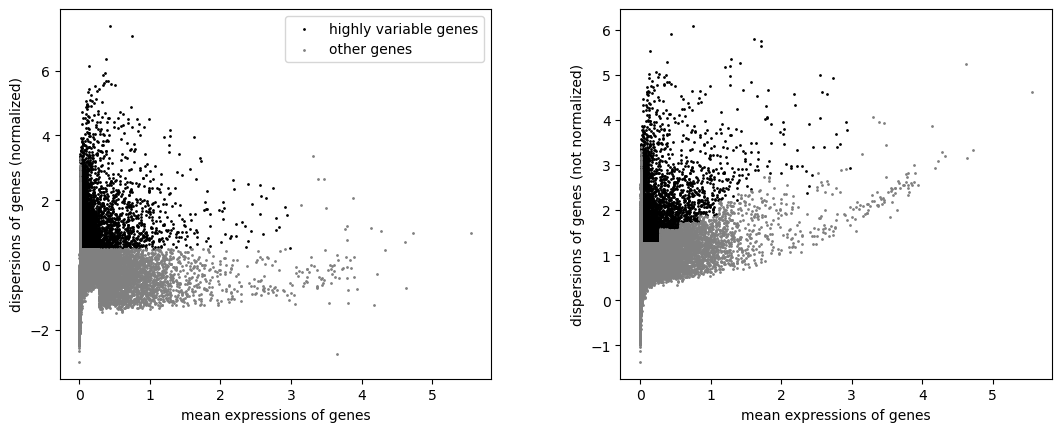

In [266]:
sc.pl.highly_variable_genes(Rhesus_singleplex)

In [268]:
sc.pp.pca(Rhesus_singleplex)

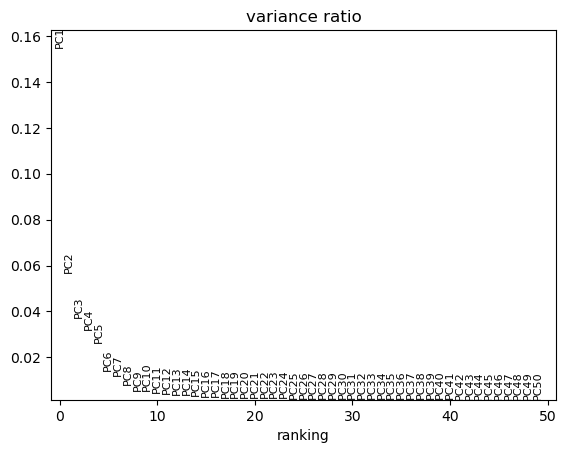

In [270]:
sc.pl.pca_variance_ratio(Rhesus_singleplex,n_pcs=50)

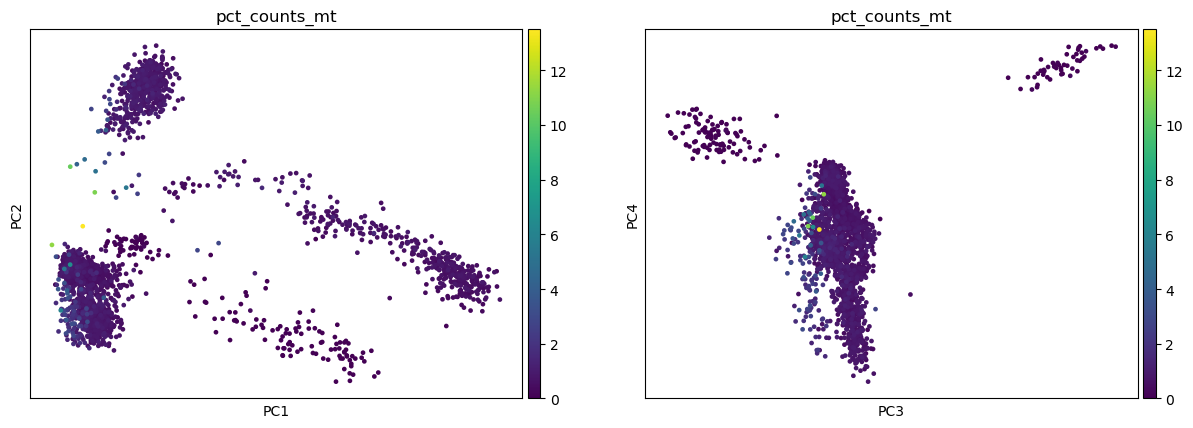

In [272]:
sc.pl.pca(Rhesus_singleplex,color=["pct_counts_mt"],dimensions=[(0,1),(2,3)])

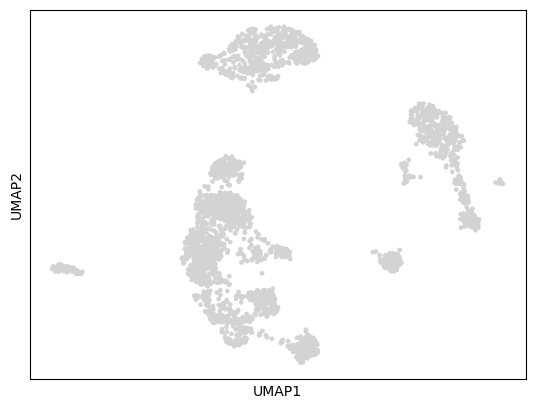

In [274]:
sc.pp.neighbors(Rhesus_singleplex)
sc.tl.umap(Rhesus_singleplex)
sc.pl.umap(Rhesus_singleplex)

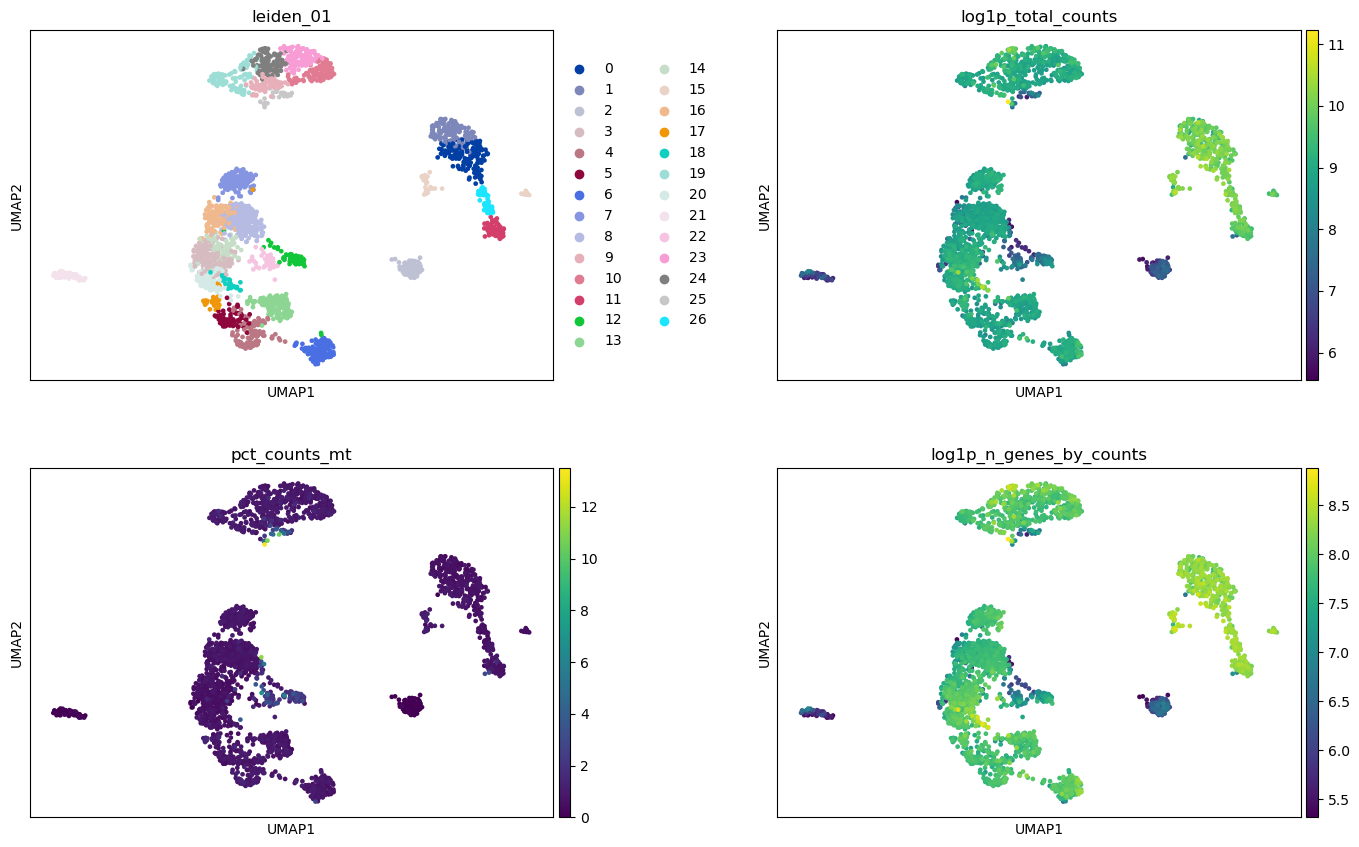

In [276]:
sc.tl.leiden(Rhesus_singleplex,flavor="igraph",key_added="leiden_01",resolution=3)
sc.pl.umap(Rhesus_singleplex,color=["leiden_01","log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],wspace=0.3,ncols=2)

In [278]:
%pip install celltypist
import celltypist as ct

Note: you may need to restart the kernel to use updated packages.


In [279]:
ct.models.download_models(model=["Immune_All_Low.pkl"], force_update=True)
model=ct.models.Model.load(model="Immune_All_Low.pkl")
predictions=ct.annotate(Rhesus_singleplex,model="Immune_All_Low.pkl", majority_voting=True, over_clustering="leiden_01")

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 54
📂 Storing models in /Users/yoofilarbi/.celltypist/data/models
💾 Total models to download: 1
💾 Downloading model [1/1]: Immune_All_Low.pkl
🔬 Input data has 2618 cells and 18115 genes
🔗 Matching reference genes in the model
🧬 4968 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🗳️ Majority voting the predictions
✅ Majority voting done!


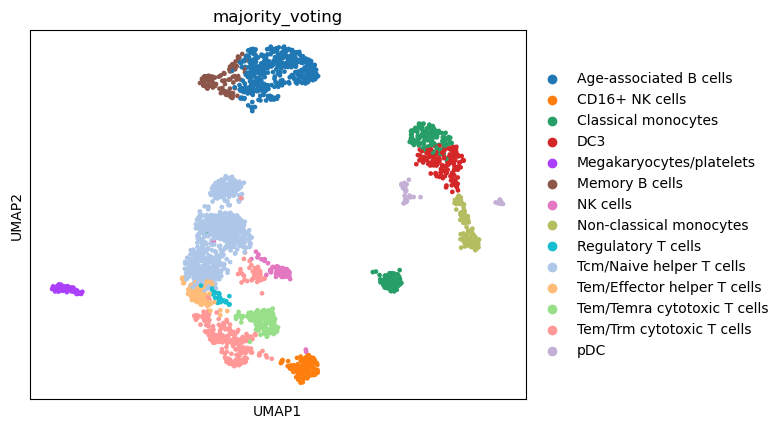

In [282]:
Rhesus=predictions.to_adata()
sc.pl.umap(Rhesus_singleplex,color="majority_voting")

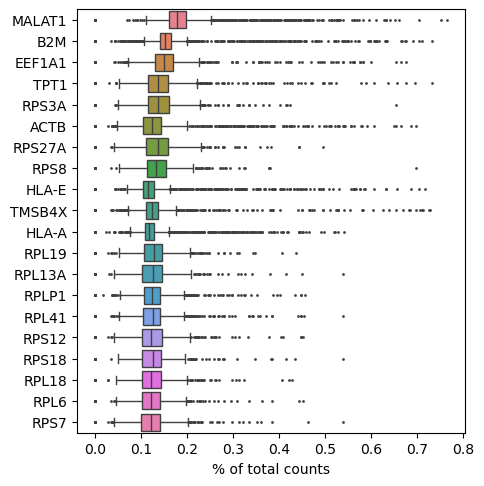

In [284]:
sc.pl.highest_expr_genes(Rhesus_singleplex, n_top=20)

In [286]:
sc.tl.rank_genes_groups(Rhesus_singleplex,'leiden_01',method='t-test')

/opt/anaconda3/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/opt/anaconda3/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/opt/anaconda3/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

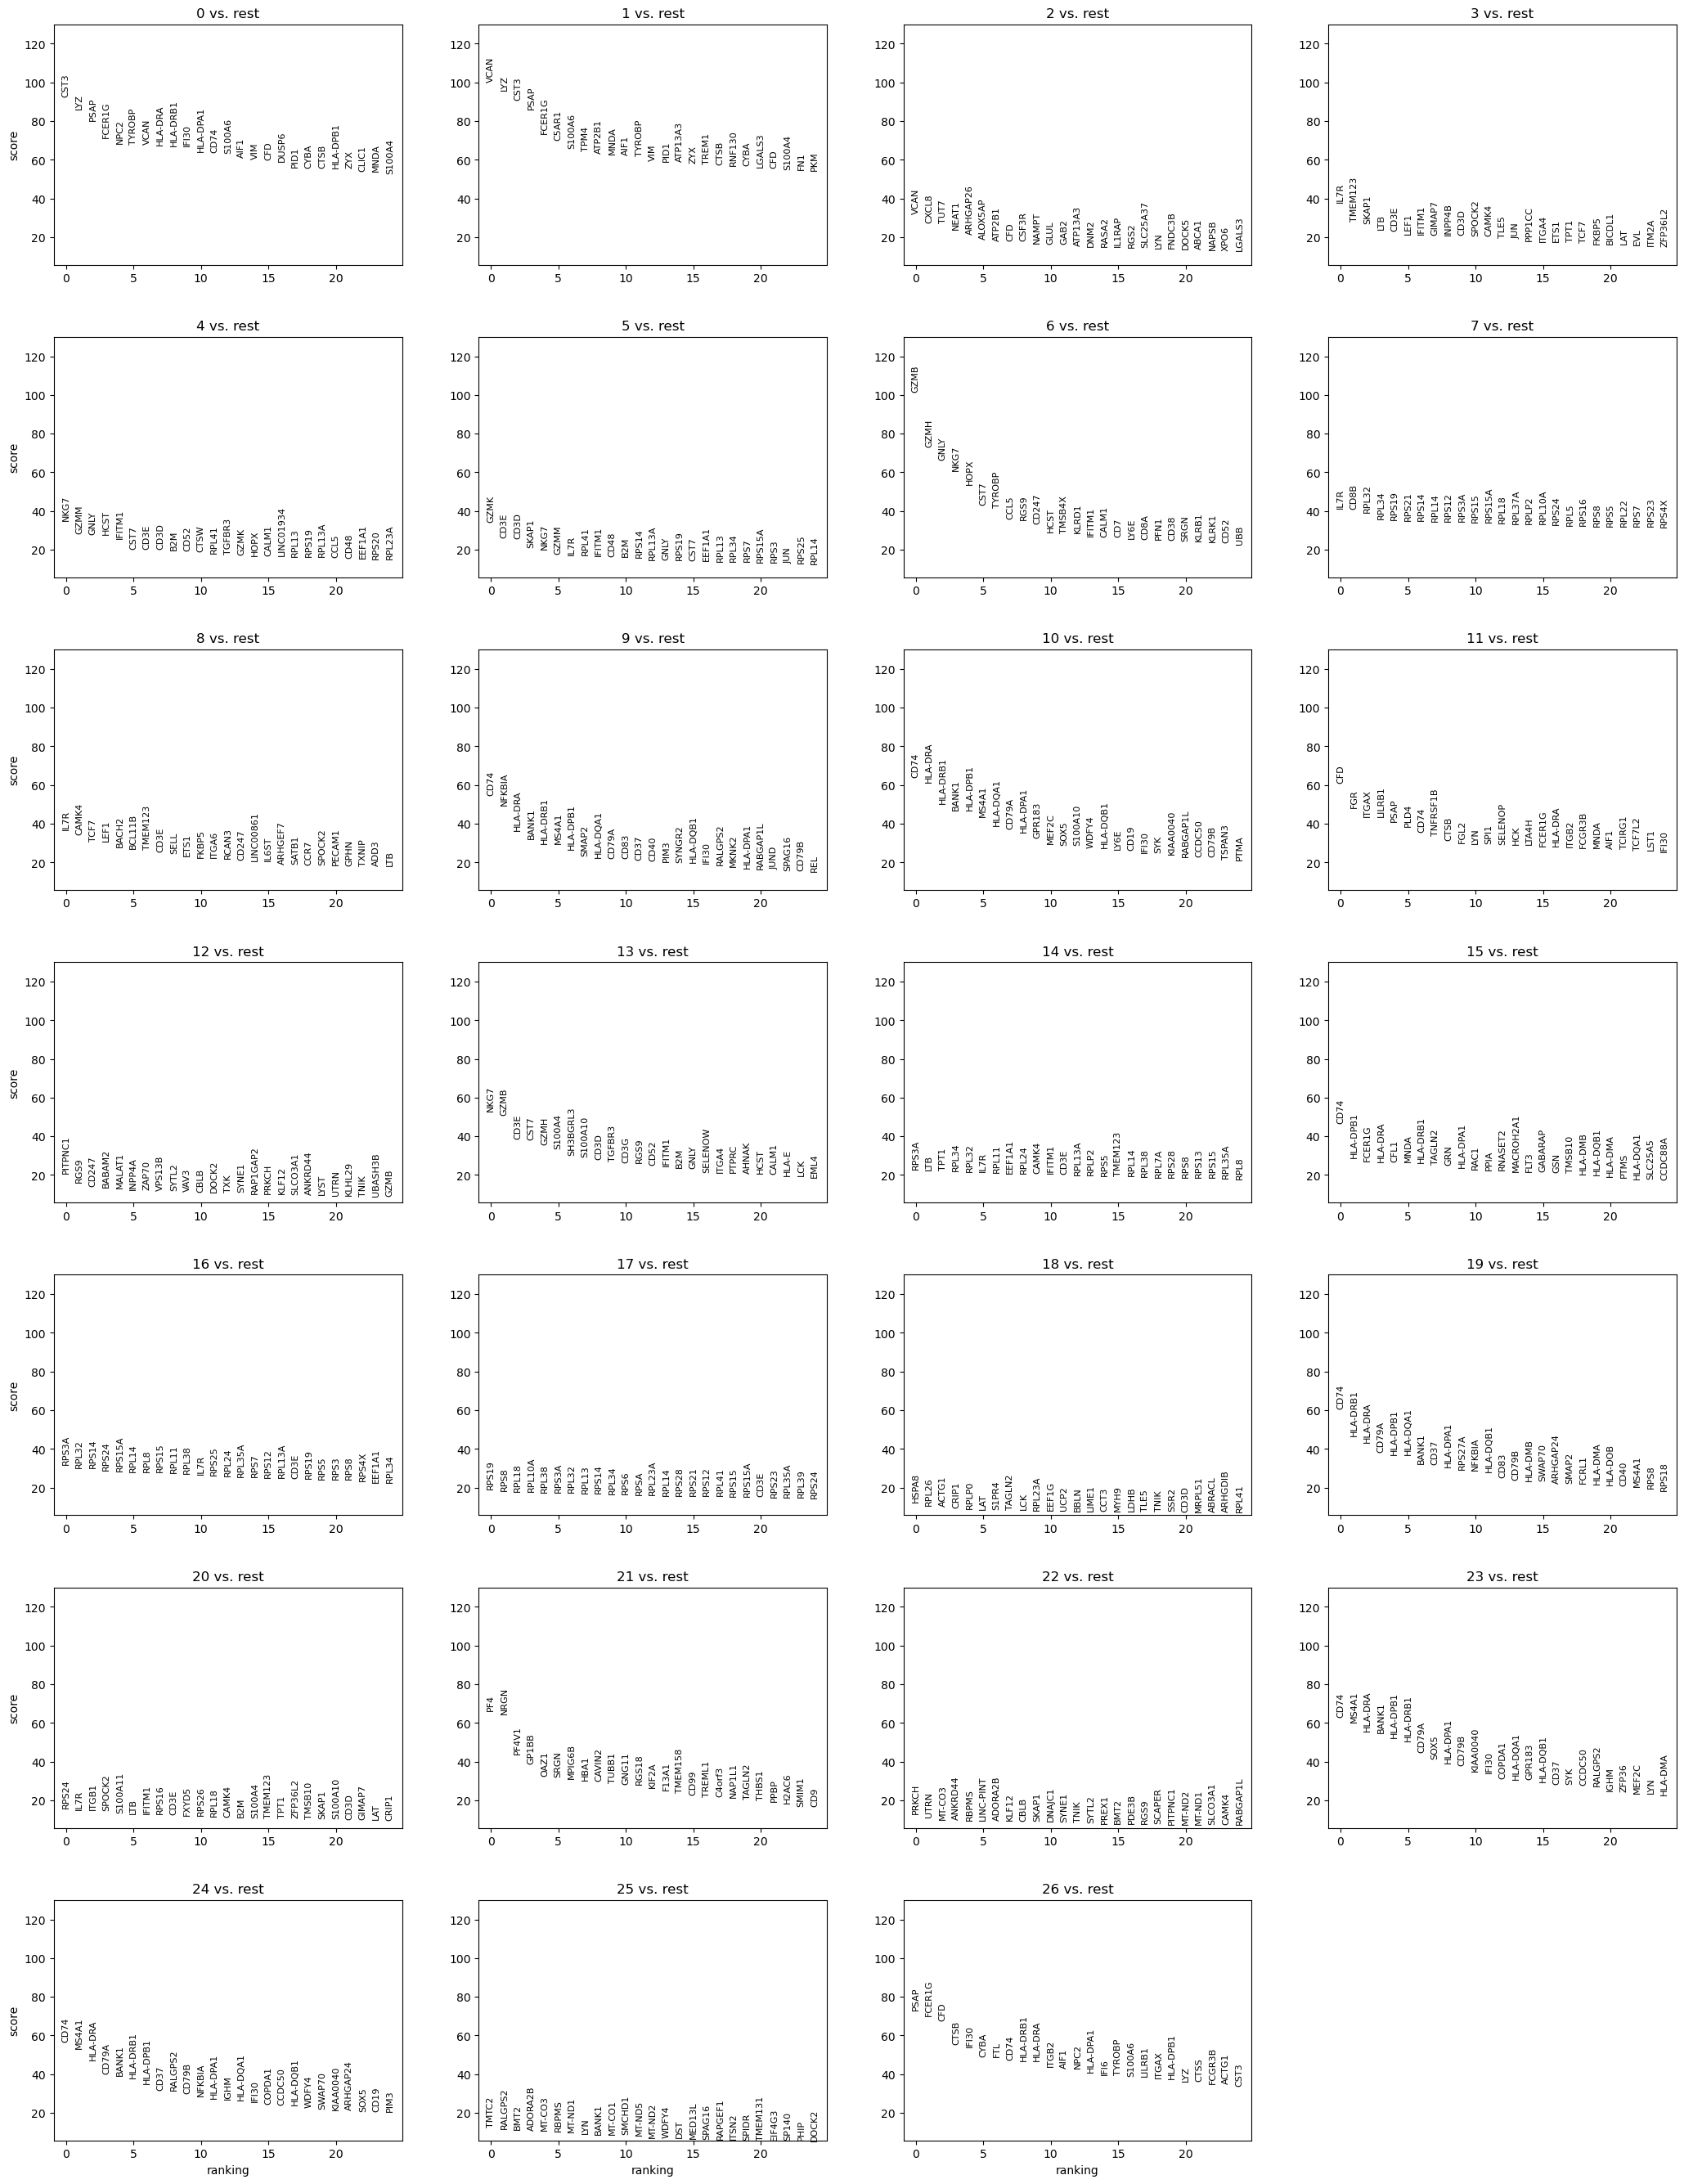

In [287]:
sc.pl.rank_genes_groups(Rhesus_singleplex,n_genes=25)

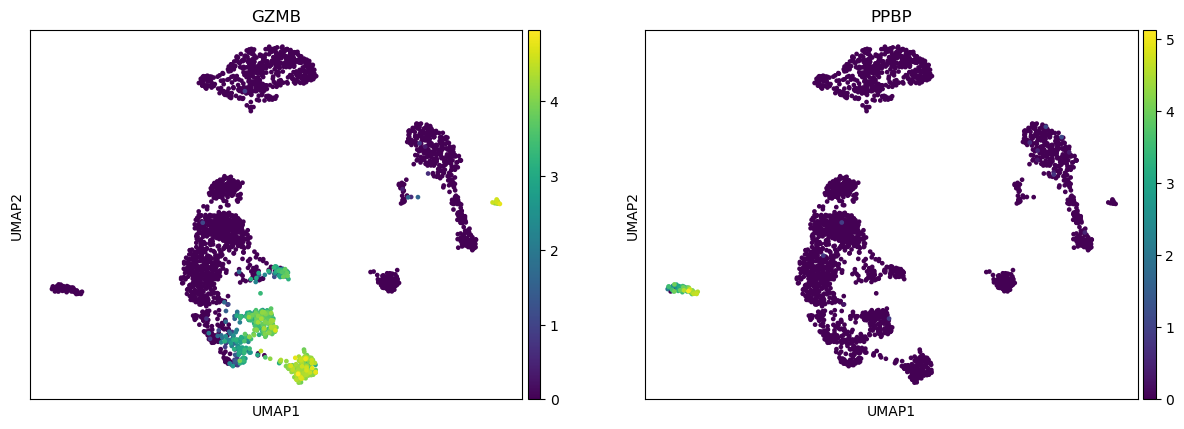

In [292]:
sc.pl.umap(Rhesus_singleplex,color=["GZMB","PPBP"])